In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from tdhf import HartreeFock
from quantum_systems import OneDimensionalHarmonicOscillator
from quantum_systems.time_evolution_operators import LaserField
from coupled_cluster.ccd import OATDCCD
from coupled_cluster.integrators import GaussIntegrator

In [34]:
class LaserPulse:

    def __init__(self, t_0=0, t_final=10, omega=8, strength=1):
        self.t_0 = t_0
        self.t_final = t_final
        self.omega = omega
        self.strength = strength

    def __call__(self, t):
        return self.strength * np.sin(self.omega * t)

In [54]:
n = 2
l = 18

radius = 10
num_grid_points = 401
omega = 0.25
mass = 1

tdho = OneDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()

hf = HartreeFock(tdho, verbose=True)
C = hf.scf(tolerance=1e-6)
tdho.change_basis(C)

(1.09327502238+0j)
(1.30210890214+0j)
(1.13553354333+0j)
(1.20958000923+0j)
(1.16561004743+0j)
(1.18748537823+0j)
(1.17555254998+0j)
(1.18174336521+0j)
(1.1784457759+0j)
(1.18017780262+0j)
(1.17926132039+0j)
(1.17974437286+0j)
(1.179489243+0j)
(1.17962384596+0j)
(1.17955279042+0j)
(1.17959028852+0j)
(1.1795704965+0j)
(1.17958094212+0j)
(1.179575429+0j)
(1.17957833872+0j)
(1.179576803+0j)
(1.17957761353+0j)
HF converged to given precision in 21 iterations
Ehf: (1.1795776135259683+0j)


In [55]:
polarization_vector = np.zeros(1)
polarization_vector[0] = 1

laser = LaserField(
    LaserPulse(omega=8*omega, strength=1),
    polarization_vector=polarization_vector
)

tdho.set_time_evolution_operator(laser)

In [56]:
cc_kwargs = dict(verbose=True)
theta_t = 0.2
theta_l = 0.4
tol = 1e-4

integrator = GaussIntegrator(np=np, eps=1e-10)
oatdccd = OATDCCD(tdho, np=np, integrator=integrator, **cc_kwargs)

t_kwargs = dict(theta=theta_t, tol=tol)
l_kwargs = dict(theta=theta_l, tol=tol)

oatdccd.compute_ground_state(t_kwargs=t_kwargs, l_kwargs=l_kwargs)
print("Ground state CCD energy: {0}".format(oatdccd.compute_ground_state_energy()))

Iteration: 0	Diff (t): [100]
Iteration: 1	Diff (t): [0.25341226437577835]
Iteration: 2	Diff (t): [0.21894315619913338]
Iteration: 3	Diff (t): [0.1403404948269556]
Iteration: 4	Diff (t): [0.12735828673190258]
Iteration: 5	Diff (t): [0.098314528262285761]
Iteration: 6	Diff (t): [0.086787655766179583]
Iteration: 7	Diff (t): [0.07175117701590672]
Iteration: 8	Diff (t): [0.062636939786929302]
Iteration: 9	Diff (t): [0.053145966917392817]
Iteration: 10	Diff (t): [0.046216062962614934]
Iteration: 11	Diff (t): [0.039612896900873662]
Iteration: 12	Diff (t): [0.034392703254820522]
Iteration: 13	Diff (t): [0.029604141671556672]
Iteration: 14	Diff (t): [0.025679944384329023]
Iteration: 15	Diff (t): [0.022148059342431525]
Iteration: 16	Diff (t): [0.019200202577944081]
Iteration: 17	Diff (t): [0.016576701010624861]
Iteration: 18	Diff (t): [0.01436353676920421]
Iteration: 19	Diff (t): [0.012408574668082373]
Iteration: 20	Diff (t): [0.010747935167347344]
Iteration: 21	Diff (t): [0.0092888280766452169]

In [57]:
oatdccd.set_initial_conditions()

In [58]:
num_timesteps = 1401
t_end = 14
time_points = np.linspace(0, t_end, num_timesteps)

In [59]:
psi_overlap = np.zeros(num_timesteps, dtype=np.complex128)
td_energies = np.zeros(num_timesteps, dtype=np.complex128)

psi_overlap[0] = oatdccd.compute_time_dependent_overlap()
td_energies[0] = oatdccd.compute_energy()

In [60]:
step_final = num_timesteps - 1

for i, amp in enumerate(oatdccd.solve(time_points)):
    step = i + 1
    print(100 * " ", end="\r")
    print(f"step = {step} / {step_final}", end="\r")
    psi_overlap[i + 1] = oatdccd.compute_time_dependent_overlap()
    td_energies[i + 1] = oatdccd.compute_energy()

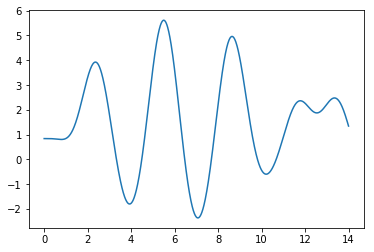

In [61]:
plt.plot(time_points, td_energies.real)
plt.show()